# AE2016

## Image Analytics Using SAS VIYA

## Presenters: 
- Ethem Can (Ethem.Can@sas.com)
- Fijoy Vadakkumpadan (Fijoy.Vadakkumpadan@sas.com)

## Keywords of the Presentation: 
- Images in SAS,
- Cognitive Computing,
- Open architecture (Python, Lua, Java)
- Image processing capabilities,
- SAS VIYA (DMML Package)
- CAS and CAS table,
- Python

### Python Imports & Functions

In [35]:
from swat import *
from pprint import pprint

%matplotlib inline
import matplotlib
import struct
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import cv2

def imageShow(casTable, imageId, nimages):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    fig = plt.figure(figsize=(20, 20))
    for i in range(nimages):
        imageData = a['Fetch'].ix[ i][ imageId]
        img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
        fig.add_subplot(1,nimages,i+1)
        plt.imshow(img_np)
        img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
        plt.xticks([]), plt.yticks([])
        
def showParticularImage(casTable, imageId, nimages, rowId):
    a = s.table.fetch(sastypes=False,sortby=[{'name':'_id_'}],table=casTable,to=nimages)
    imageData = a['Fetch'].ix[ rowId][ imageId]
    img_np = cv2.imdecode(np.fromstring( imageData, np.uint8),1)
    fig = plt.figure(figsize=(20, 20))
    plt.imshow(img_np)
    img_np[:,:,[0,2]]=img_np[:,:,[2,0]]
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()  

### Connect to CAS

In [36]:
s = CAS('cas01.unx.sas.com', 11943)
s.loadactionset('image')

NOTE: Added action set 'image'.


[actionset]

 'image'

+ Elapsed: 0.0204s, user: 0.021s, sys: 0.01s, mem: 0.514mb

### Load Images

NOTE: Loaded 96 images from /u/etfcan/action_recognition/frames into Cloud Analytic Services table action.
+ Elapsed: 0.194s, user: 0.086s, sys: 0.169s, mem: 10.8mb


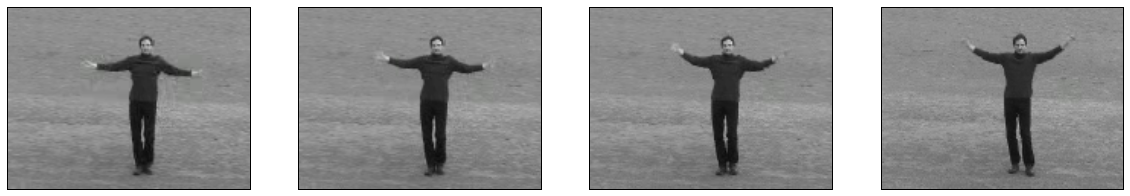

In [37]:
#s.table.loadtable(path='action.sashdat')
r = s.image.loadImages(casout={'name':'action', 'replace':True},
                       path='/u/etfcan/action_recognition/frames')
imageTable = s.CASTable('action')
imageShow(imageTable, 0, 4)
print(r)

### Process Images 

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.1s, user: 4.09s, sys: 0.185s, mem: 267mb


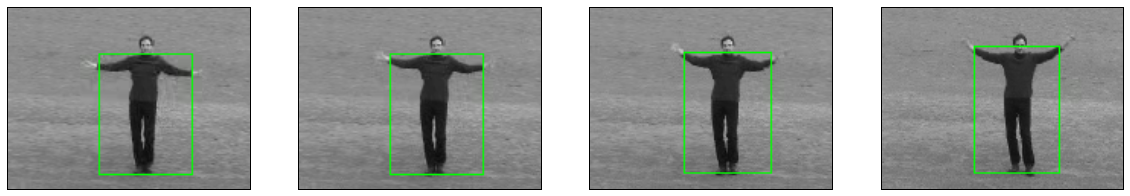

In [38]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True}, 
        imagetable={'name':'action'},
        imageFunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
        
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':1}},
        
            {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                        'boundingbox':True,'approximate':True,'groupboxes':True}}])
print(r)
outTable = s.CASTable('resultingImages')
imageShow(outTable, 0, 4)

## Individual Steps

### Grayscale Images

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.168s, user: 0.486s, sys: 0.19s, mem: 266mb


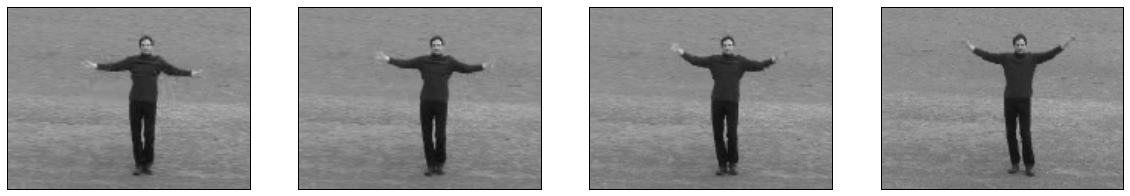

In [39]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True}, 
        imagetable={'name':'action'},
        imagefunctions=[{'options':{'functiontype':'CONVERT_COLOR'}}]) #change color space
print(r)
imageShow(outTable, 0, 4)

### Noise Reduction 

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.02s, user: 3.86s, sys: 0.192s, mem: 266mb


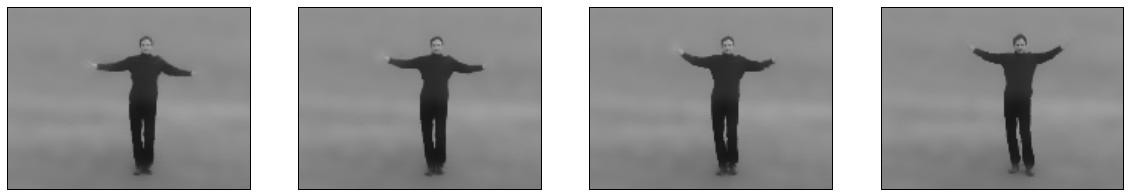

In [40]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True}, 
        imagetable={'name':'action'},
        imagefunctions=[
            {'functionoptions':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'functionoptions':{'functiontype':'BILATERAL_FILTER', #noise reduction
                                'diameter':13,'sigmacolor':30,'sigmaspace':30}}])
print(r)
imageShow(outTable, 0, 4)

### Thresholding

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.996s, user: 3.75s, sys: 0.17s, mem: 266mb


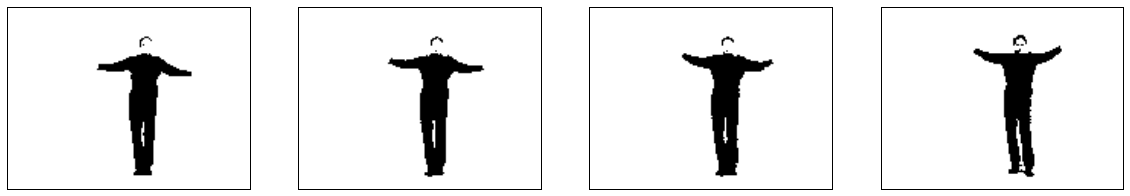

In [41]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}}])
print(r)
imageShow(outTable, 0, 4)

### Edge Detection

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 0.991s, user: 3.74s, sys: 0.196s, mem: 266mb


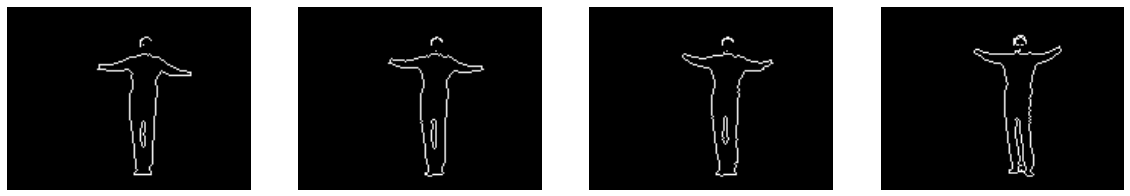

In [42]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
        
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':1}}])
print(r)
imageShow(outTable, 0, 4)

### Contour Detection 

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.08s, user: 4.06s, sys: 0.222s, mem: 267mb


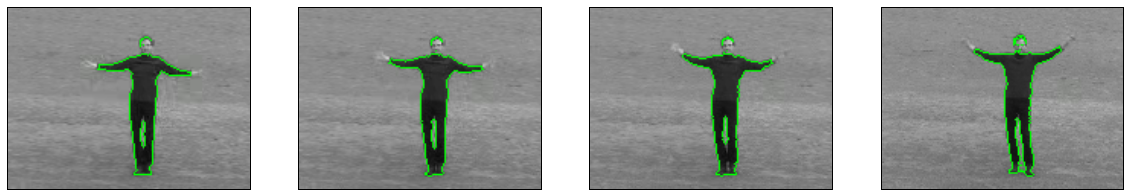

In [43]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
        
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':1}},
        
            {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                        'boundingbox':False,'approximate':False,'groupboxes':False}}])
print(r)
imageShow(outTable, 0, 4)

#### Approximating Contours

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.12s, user: 4.1s, sys: 0.22s, mem: 267mb


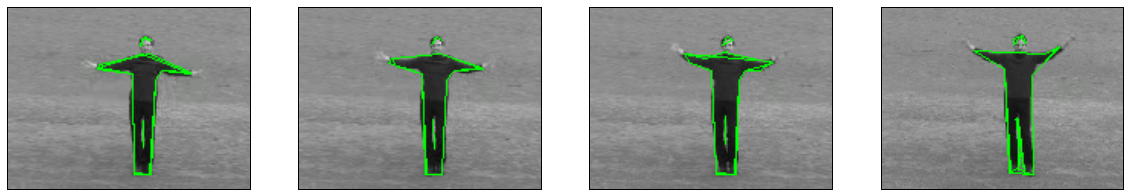

In [44]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[
            {'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
        
            {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                        'diameter':13,'sigmacolor':30,'sigmaspace':30}},
        
            {'options':{'functiontype':'THRESHOLD', #image binarization
                        'type':'OTSU','value':125}},
        
            {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                        'kernelsize':1,'delta':0,'scale':1}},
        
            {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                        'boundingbox':False,'approximate':True,'groupboxes':False}}])
print(r)
imageShow(outTable, 0, 4)

#### Finding Bouding Boxes 

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.09s, user: 4.07s, sys: 0.222s, mem: 267mb


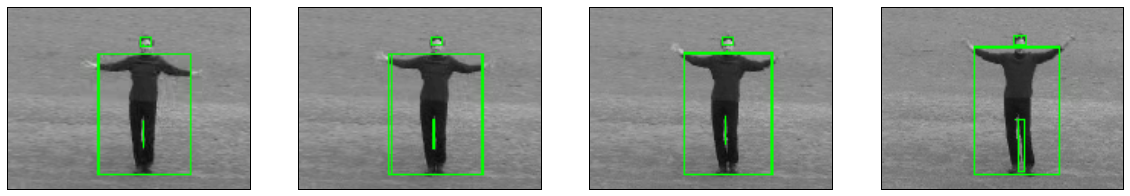

In [45]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[{'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
                        
                        {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                                    'diameter':13,'sigmacolor':30,'sigmaspace':30}},
                        
                        {'options':{'functiontype':'THRESHOLD', #image binarization
                                    'type':'OTSU','value':125}},
                        
                        {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                                    'kernelsize':1}},
                        
                        {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                                    'boundingbox':True,'approximate':True,'groupboxes':False}}])
print(r)
imageShow( outTable, 0, 4)

#### Grouping Bounding Boxes 

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as compressed images to the Cloud Analytic Services table resultingImages.
+ Elapsed: 1.12s, user: 4.19s, sys: 0.204s, mem: 267mb


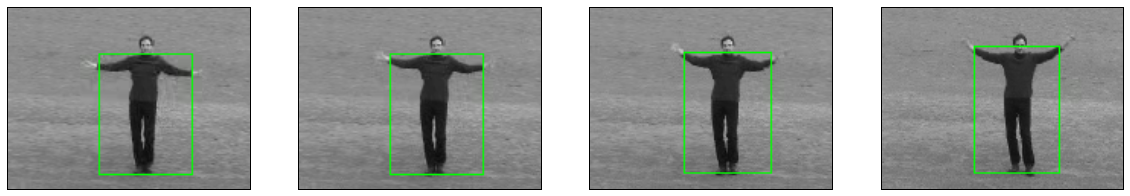

In [46]:
r = s.image.processImages(casout={'name':'resultingImages','replace':True},
        imagetable={'name':'action'},
        imagefunctions=[{'options':{'functiontype':'CONVERT_COLOR'}}, #change color space
                        
                        {'options':{'functiontype':'BILATERAL_FILTER', #noise reduction
                                    'diameter':13,'sigmacolor':30,'sigmaspace':30}},
                        
                        {'options':{'functiontype':'THRESHOLD', #image binarization
                                    'type':'OTSU','value':125}},
                        
                        {'options':{'functiontype':'LAPLACIAN', #edge detection with the Laplace operator
                                    'kernelsize':1}},
                        
                        {'options':{'functiontype':'CONTOURS', #contour detection and drawing
                                    'boundingbox':True,'approximate':True,'groupboxes':True}}])
print(r)
imageShow(outTable, 0, 4)

## What's in progress now?

In [47]:
s.table.loadtable(casout={'name':'inprogress', 'replace':True},
                  caslib='casuser',path='inprogress.sashdat')
inprogress = s.CASTable('inprogress')

NOTE: Cloud Analytic Services made the file inprogress.sashdat available as table INPROGRESS in caslib CASUSERHDFS(fivada).


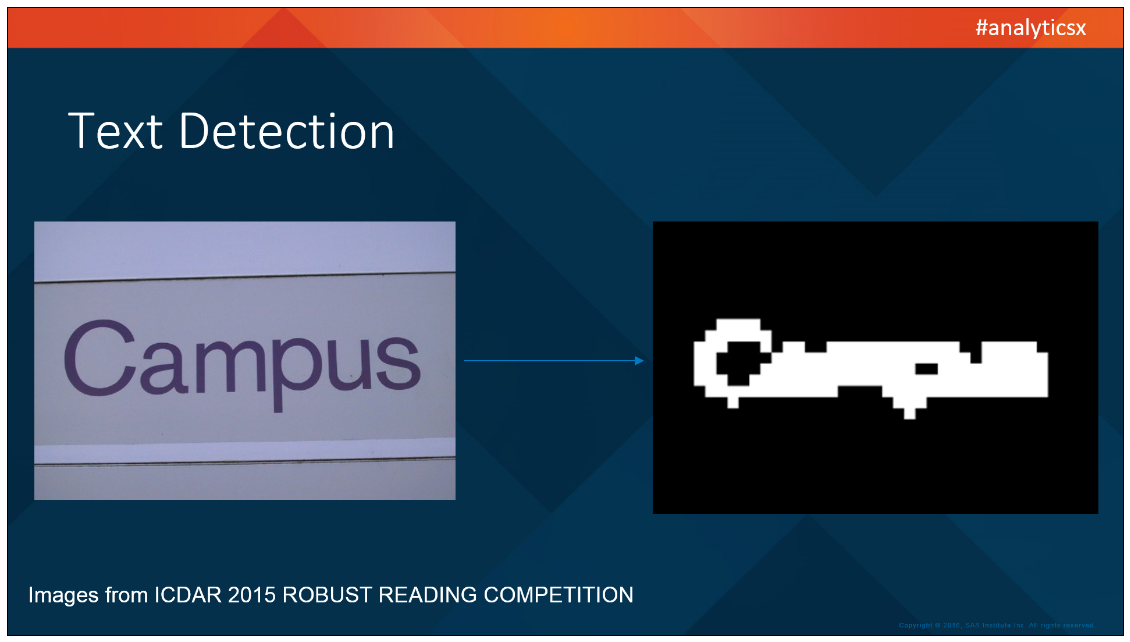

In [48]:
showParticularImage( inprogress, 0, 3, 2)

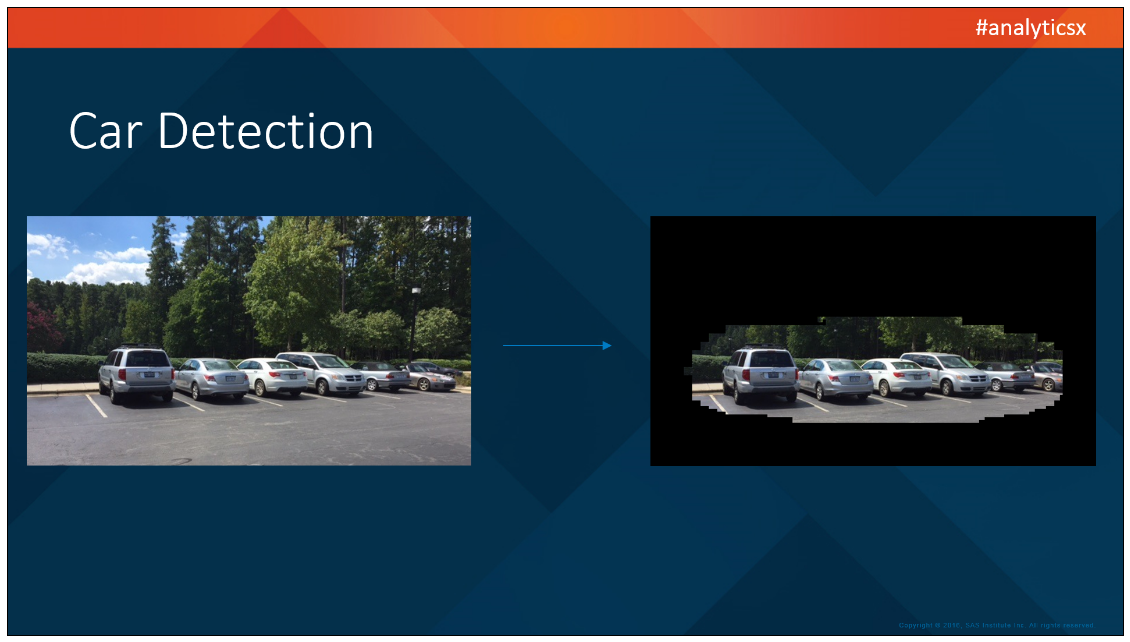

In [49]:
showParticularImage( inprogress, 0, 3, 0)

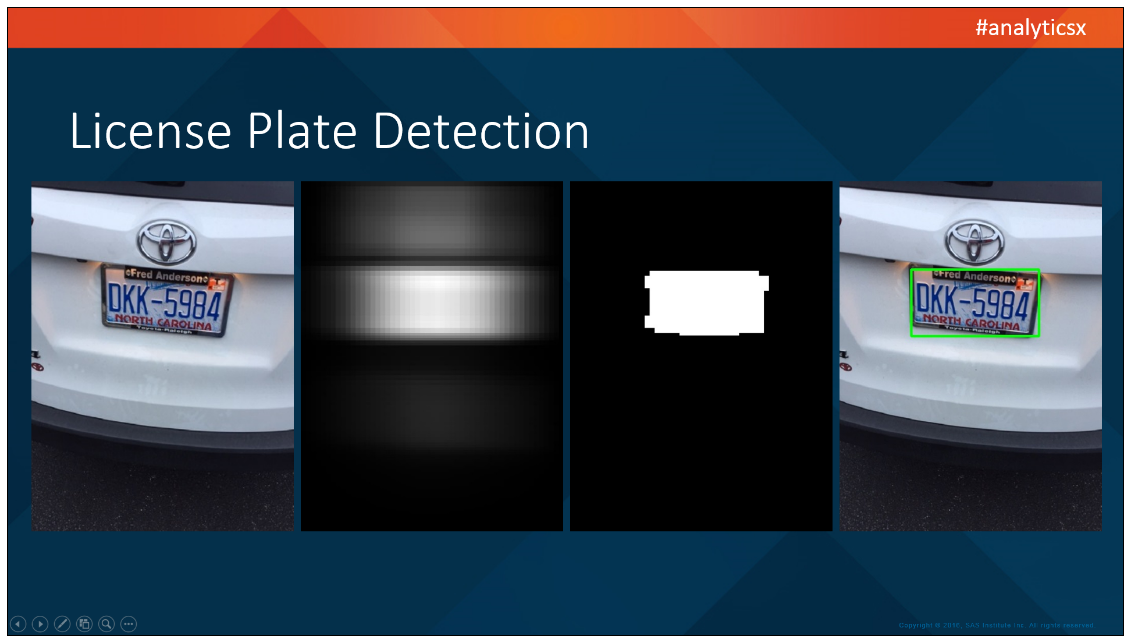

In [50]:
showParticularImage( inprogress, 0, 3, 1)

## Rest of this demo
- Combine basic image processing and statistical analyses actions in SAS Viya to solve a real-world problem
- Gesture classification
- PCA and K-means clustering

In [51]:
import pandas as pd
import swat.datamsghandlers as dmh

def reverse(a, axis=0): 
    idx = [slice(None)]*len(a.shape)
    idx[axis] = slice(None, None, -1)
    return a[idx]

def displaySlide(binaries, width, height, n):
    slideImage = bytearray(binaries[n])
    slideImage = np.reshape(slideImage, (height, width, 3))
    slideImage = reverse(slideImage, 2)
    plt.figure(figsize = (11,22))
    plt.imshow(slideImage)
    plt.show()

def displayImagePair(binaries, width, height, i1, i2):
    image1 = bytearray(binaries[i1])
    image1 = np.reshape(image1, (height, width))
    image2 = bytearray(binaries[i2])
    image2 = np.reshape(image2, (height, width))
    fig = plt.figure(figsize = (10, 10./height*width))
    fig.add_subplot(121)
    plt.imshow(image1)
    plt.gray()
    plt.xticks([0, width], fontsize=15)
    plt.yticks([0, height], fontsize=15)
    fig.add_subplot(122)
    plt.imshow(image2)
    plt.gray()
    plt.xticks([0, width], fontsize=15)
    plt.yticks([0, height], fontsize=15)
    plt.show()
    
def ImageBinaries2Matrix(imageBinaries, nImages, nRows, nCols):
    images = np.empty((nImages, nRows*nCols))
    for i in range(nImages):
        images[i] = bytearray(imageBinaries[i])
    return images

def Matrix2CASTable(casSession, tableName, matrix, baseColName="c"):
    nRows, nCols = matrix.shape
    baseColName = baseColName.strip()
    colNames = [baseColName + str(i) for i in range(1, nCols + 1)]
    df = pd.DataFrame(matrix, columns=colNames)
    handler = dmh.PandasDataFrame(df)
    casSession.addtable(table=tableName.strip(), replace=True, **handler.args.addtable)
    
def CASTable2Matrix(casSession, tableName, fromRow, nRows, nCols, baseColName="c"):
    fetchedTable = casSession.fetch(table=tableName, sastypes=False, From=fromRow, to=fromRow+nRows-1)['Fetch']
    baseColName = baseColName.strip()
    colNames = [baseColName + str(i) for i in range(1, nCols + 1)]
    matrix = np.zeros((nRows, nCols))
    for i in range(nCols):
        matrix[:, i] = fetchedTable[colNames[i]]
    return matrix

import os,time
def get_information(directory):
    file_list = []
    for i in os.listdir(directory):
        a = os.stat(os.path.join(directory,i))
        file_list.append([i,time.ctime(a.st_mtime),time.ctime(a.st_ctime)]) #[file,most_recent_access,created]
    return file_list

### Loading slides

In [52]:
s.image.loadImages(path='/u/fivada/Playpens/AE2016/Presentation/slides_FV/', 
                   casOut=vl(name='slides', replace='TRUE'), decode=True)
fetchedSlides=s.fetch(table='slides', sastypes=False, sortBy="_path_", 
                      fetchVars={"_resolution_", "_image_", "_path_"}, to=1000000)['Fetch']
slideBinaries=fetchedSlides["_image_"]
slideResolutions=fetchedSlides["_resolution_"]
res = np.fromstring( slideResolutions[0], np.int64)
slideWidth = res[0]
slideHeight = res[1]

NOTE: Loaded 7 images from /u/fivada/Playpens/AE2016/Presentation/slides_FV/ into Cloud Analytic Services table slides.


### Recreating thresholded images
- Recreating silhouettes of gestures by converting original images to grayscale, filtering, and thresholding

NOTE: Table ACTION contains compressed images.
NOTE: 96 out of 96 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table gesturesOriginal.


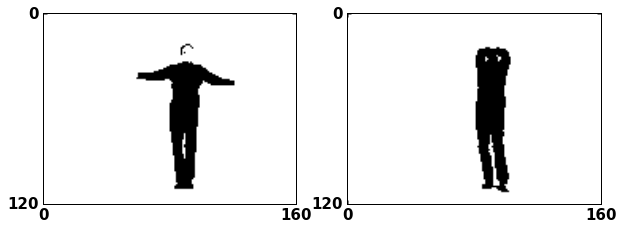

In [54]:
# Perform the 3 steps using processImages action
s.image.processImages(casout={'name':'gesturesOriginal','replace':True},imagetable={'name':'action'},
                      imagefunctions=[
                        {'options':{'functiontype':'CONVERT_COLOR'}},
                        {'options':{'functiontype':'BILATERAL_FILTER','diameter':13,'sigmacolor':30,'sigmaspace':30}},
                        {'options':{'functiontype':'THRESHOLD','type':'OTSU','value':125}}],
                      decode=True)

# Fetch and display representative images
fetchedImages=s.fetch(table='gesturesOriginal', sastypes=False, sortBy="_path_",
                      fetchVars={"_path_", "_resolution_", "_image_"}, to=4)['Fetch']
imageResolutions=fetchedImages["_resolution_"]
imageBinaries=fetchedImages["_image_"]
res = np.fromstring( imageResolutions[0], np.int64)
originalWidth = res[0]
originalHeight = res[1]
displayImagePair(imageBinaries, originalWidth, originalHeight, 0, 3)

### Downsampling
- Reducing data dimensionality by downsampling the images. Calling RESIZE function of processImages action, and thresholding the resulting images to produce binary data

NOTE: Table GESTURESORIGINAL contains decompressed images.
NOTE: 96 out of 96 images were processed successfully and saved as decompressed images to the Cloud Analytic Services table gestures.


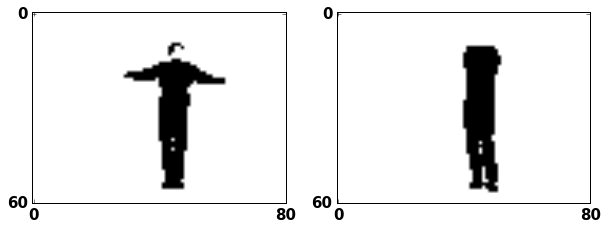

In [55]:
# Calling processImages
s.image.processImages(imageTable='gesturesOriginal', 
                      casOut=vl(name='gestures', replace='TRUE'),
                      imageFunctions=[vl(functionOptions=vl(functionType="RESIZE", width=originalWidth/2, 
                                                            height=originalHeight/2)),
                                      vl(functionOptions=vl(functionType="THRESHOLD", type="BINARY", 
                                                            value=200))],
                      decode=True)

# Fetch image binaries, and related data
fetchedImages=s.fetch(table='gestures', sastypes=False, sortBy="_path_",
                      fetchVars={"_path_", "_resolution_", "_image_"}, to=1000000)['Fetch']
imageResolutions=fetchedImages["_resolution_"]
imageBinaries=fetchedImages["_image_"]
res = np.fromstring( imageResolutions[0], np.int64)
width = res[0]
height = res[1]
nImages = len(imageBinaries)
displayImagePair(imageBinaries, width, height, 0, 3)

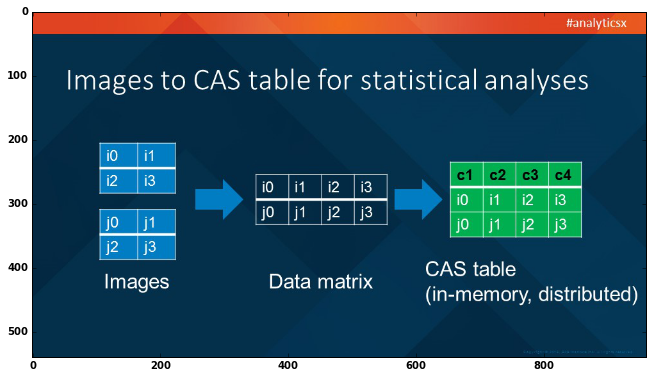

In [56]:
displaySlide(slideBinaries, slideWidth, slideHeight, 1)

### Creating image data matrix
- Convert each image into a row of a data matrix

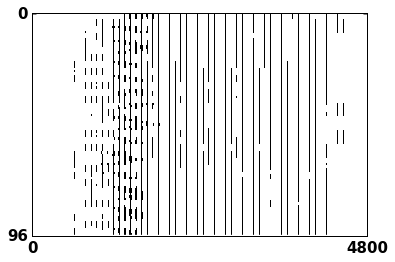

In [57]:
# Read the binary blob of each image and extract the pixel values into a matrix
gestureMatrix = ImageBinaries2Matrix(imageBinaries, nImages, height, width)

# Display the matrix
fig = plt.figure()
plt.imshow(gestureMatrix, interpolation='nearest', aspect='auto')
plt.xticks([0, height*width], fontsize=15)
plt.yticks([0, nImages], fontsize=15)
plt.show()

### Deleting constant columns and creating CAS table
- No need to analyze columns with zero variance. Create CAS table using pandas library in Python, and addTable action

In [59]:
# Delete constant columns
gestureMatrix = np.delete(gestureMatrix, np.where(np.all(gestureMatrix==255, axis=0)), axis=1)
gestureMatrix = np.delete(gestureMatrix, np.where(np.all(gestureMatrix==0, axis=0)), axis=1)

# Convert data matrix into CAS table in the server using pandas, and addTable action
Matrix2CASTable(s, 'gestureTable', gestureMatrix)
fetchedImages=s.fetch(table='gestureTable', sastypes=False, to=3)['Fetch']
print(fetchedImages)

Selected Rows from Table GESTURETABLE

      c1     c2     c3     c4     c5     c6     c7     c8     c9    c10  \
0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
1  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
2  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   

   ...     c624  c625   c626   c627   c628   c629   c630   c631   c632   c633  
0  ...      0.0   0.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  
1  ...    255.0   0.0    0.0    0.0    0.0  255.0    0.0    0.0    0.0  255.0  
2  ...    255.0   0.0    0.0    0.0    0.0  255.0  255.0  255.0  255.0  255.0  

[3 rows x 633 columns]


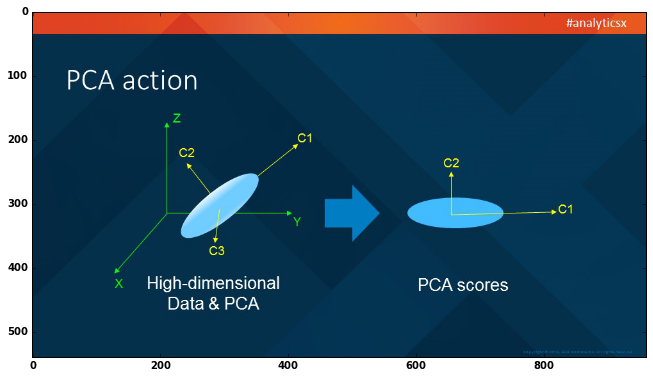

In [60]:
displaySlide(slideBinaries, slideWidth, slideHeight, 2)

### Invoke PCA action and get scores for each image
- Perform PCA using eigen decomposition. Project each image into a 2D space.

NOTE: Added action set 'pca'.


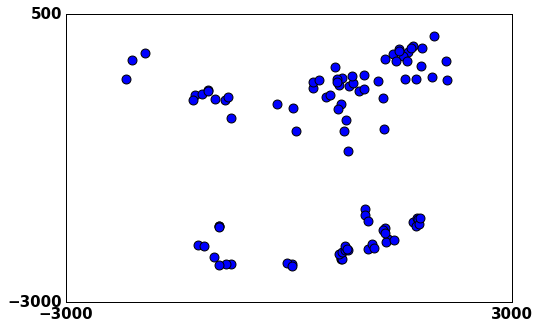

In [61]:
s.loadactionset('pca')
nRows, nCols = gestureMatrix.shape

# Call PCA action
s.pca.eig(table='gestureTable',
          n=2, 
          output=vl(casOut=vl(name='pcaScores', replace='TRUE')),
          outStat=vl(casOut=vl(name='pcaStats', replace='TRUE')))

# Retrieve results and calculate scores
fromRow = nCols+5
pcaaxes = np.transpose(CASTable2Matrix(s, 'pcaStats', fromRow, 2, nCols))
scores = gestureMatrix.dot(pcaaxes);

# Plot scores
from mpl_toolkits.mplot3d import Axes3D
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
fig = plt.figure()
r = plt.scatter(scores[:, 0], scores[:, 1], marker = 'o', c='b', s=80)
fig.set_size_inches(8, 5)
plt.subplots_adjust(bottom = 0.1)
plt.xticks([-3000, 3000], fontsize=15)
r = plt.yticks([-3000, 500], fontsize=15)


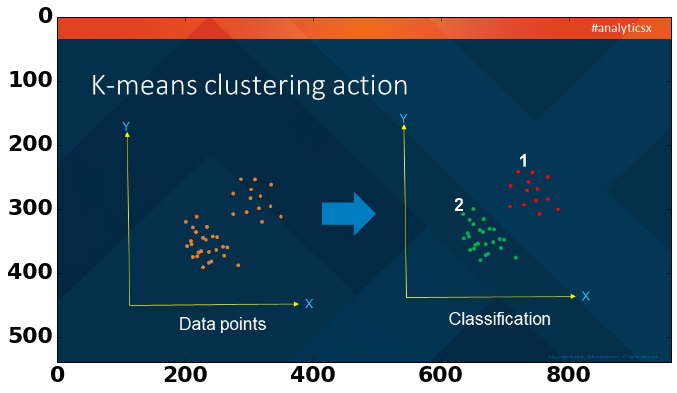

In [62]:
displaySlide(slideBinaries, slideWidth, slideHeight, 3)

### Invoke K-means clustering action and get the label for each image
- Invoke K-means clustering with 2 clusters on the 2D data. Get the class label for each cluster.

In [64]:
# Perform K-means clustering
s.loadactionset('clustering')
nRows, nCols = scores.shape
scoresId = np.zeros((nRows, nCols+1))
scoresId[:, list(range(2))] = scores;
scoresId[:, 2] = list(range(nRows))
Matrix2CASTable(s, 'scoresTable', scoresId)
s.clustering.kClus(table='scoresTable', inputs={'c1', 'c2'}, nClusters=2,
                   output=vl(casOut=vl(name='labels', replace=True), copyVars={'c3'}),
                   seed=10)

# Retrieve the class label for each point
fetchedLabels=s.fetch(table='labels', sastypes=False, to=1000000)['Fetch']
casLabels = fetchedLabels['_CLUSTER_ID_']
labelIds = fetchedLabels['c3']
casScores = scores[[int(i) for i in labelIds], :]

NOTE: Added action set 'clustering'.
NOTE:  Using SEED=10.
NOTE: Running for input data for K 2.
NOTE: Clustering is finished. STOPVALUE is satisfied for STOPCRITERION=CLUSTER_CHANGE.


### Plotting the projections with K-means clusters and actual labels
- Assess whether PCA + K-means clustering was able to group the gestures

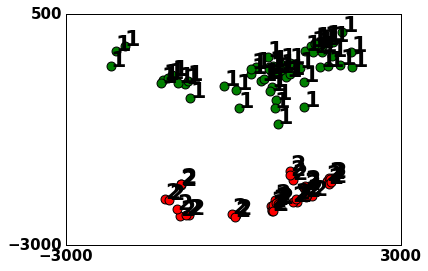

In [65]:
# Plot points, K-means labels, and ground truth classes
plt.scatter(casScores[np.where(casLabels==1), 0], casScores[np.where(casLabels==1), 1], 
            marker = 'o', c='r', s=80, label='Gesture 1')
plt.scatter(casScores[np.where(casLabels==2), 0], casScores[np.where(casLabels==2), 1], 
            marker = 'o', c='g', s=80, label='Gesture 2')
actualLabels = [1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 
                2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 
                2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1]
for i in range(96):
    plt.text(scores[i, 0], scores[i, 1], str(actualLabels[i]))
fig.set_size_inches(10, 6)
plt.subplots_adjust(bottom = 0.1)
plt.xticks([-3000, 3000], fontsize=15)
r = plt.yticks([-3000, 500], fontsize=15)

### The saveImages action
- Save images to disk in desired format

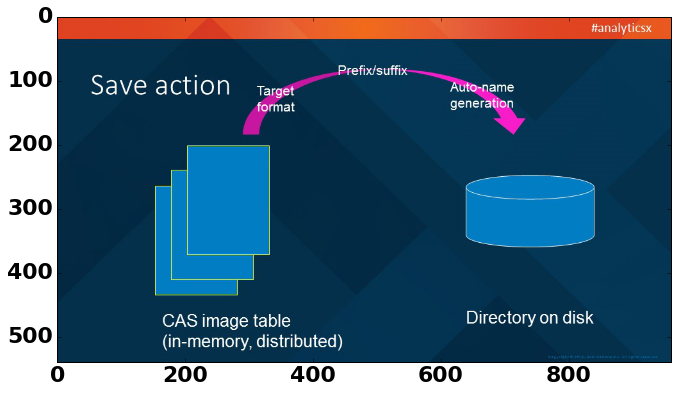

In [66]:
displaySlide(slideBinaries, slideWidth, slideHeight, 4)

In [67]:
# Invoke the saveImages action
r = s.image.saveImages(caslib='casuser', 
                   images=vl(table='gestures', path='_path_'),
                   subDirectory='Playpens/AE2016/GesturesJPG',
                   type='jpg', 
                   suffix='duplicate')

NOTE: Wrote 96 images from Cloud Analytic Services table GESTURES into /u/fivada/Playpens/AE2016/GesturesJPG/.


In [69]:
# Confirm that the images were saved
info = get_information('U://Playpens//AE2016//GesturesJPG/')
print(info[0])
print(info[1])

['image-00005duplicate.jpg', 'Tue Sep 13 14:29:11 2016', 'Thu Sep  1 13:08:21 2016']
['image-00006duplicate.jpg', 'Tue Sep 13 14:29:11 2016', 'Thu Sep  1 13:08:21 2016']


### The compareImages Action
- Compare images between 2 sets of images. Identify pairs of images and compute image similarity.

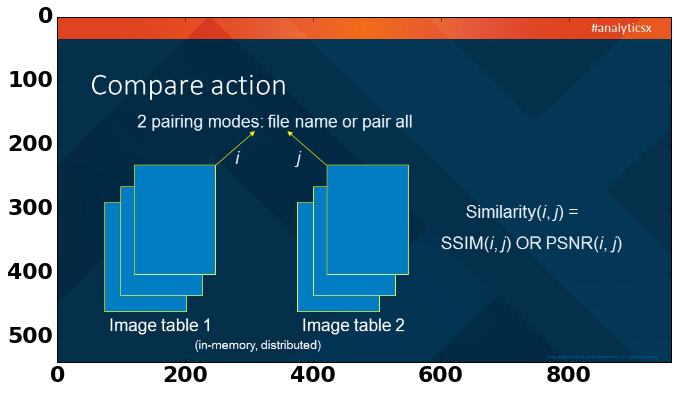

In [70]:
displaySlide(slideBinaries, slideWidth, slideHeight, 5)

### compareImages demo
- Compare binary PNG gesture images with their JPG versions

In [71]:
# Load the JPG images saved before
s.image.loadImages(path='/u/fivada/Playpens/AE2016/GesturesJPG/', 
                   casOut=vl(name='duplicates', replace='TRUE'), decode=True)

# Compare data from uncompressed PNG images with those from JPG images
s.image.compareImages(sourceImages=vl(table='gestures'), 
                      referenceImages=vl(table='duplicates'), 
                      casOut=vl(name='comparisons', replace=True), 
                      pairAll=True,
                      minimum=0.95)
fetchedComps=s.fetch(table='comparisons', fetchVars={"_channel1_", "_source_id_", "_reference_id_"}, 
                     sortBy='_source_id_', sastypes=False, From=1, to=13)['Fetch']
print(fetchedComps)

NOTE: Loaded 96 images from /u/fivada/Playpens/AE2016/GesturesJPG/ into Cloud Analytic Services table duplicates.
NOTE: A value was not specified for the DAL flags; the default value of TKCASDAL_DAL_SINGLE_PASS was used.
Selected Rows from Table COMPARISONS

              _reference_id_  _channel1_      _source_id_
0   image-00004duplicate.jpg    0.999544  image-00004.png
1   image-00005duplicate.jpg    0.999485  image-00005.png
2   image-00006duplicate.jpg    0.999178  image-00006.png
3   image-00017duplicate.jpg    0.998800  image-00017.png
4   image-00018duplicate.jpg    0.993170  image-00017.png
5   image-00019duplicate.jpg    0.990972  image-00017.png
6   image-00017duplicate.jpg    0.993133  image-00018.png
7   image-00019duplicate.jpg    0.996666  image-00018.png
8   image-00018duplicate.jpg    0.998864  image-00018.png
9   image-00018duplicate.jpg    0.996598  image-00019.png
10  image-00017duplicate.jpg    0.990867  image-00019.png
11  image-00019duplicate.jpg    0.998897  ima

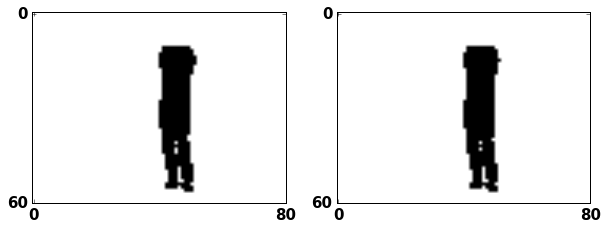

In [72]:
fig = displayImagePair(imageBinaries, width, height, 3, 4)

## Summary 
- Images now a first-class citizen in SAS
- Load, process, analyze, compare, and save images
- Available in DMML package in SAS Viya
- Future releases will build on these and deep learning to solve highly complex problems